# Lab 1.1 - Cleaning and Analyzing Warehouse Data

## Objective
1. Import a CSV dataset using `pandas`
2. Clean the dataset using multiple techniques
3. Answer questions about using the data. 

*Use the challenge dataset to practice cleaning with regex.*

## Rubric

- 6 pts - Contains all required components and uses professional language
- 5 pts - Contains all required components, but uses unprofessional language, formating, etc. 
- 4 pts - Contains some, but not all, of the required components
- 3 pts - Did not submit

## Pandas reference

In addtion to the methods you learned last lab, you may need the following: 

- `df.dtypes` - the data types of the each column
- `df.columns` - the name of each column
- `df.shape` - the number of rows and columns of the dataset
- `df.dropna()` - removes null values
- `pd.todatetime(...)` - sets a given column to a `datetime` object
- `df.column.isunique` - returns True if all data are unique
- `df.column.unique()` - returns all of the uniue values of a column
- `df['col'].replace(...,...)` - replaces values in a column with another value
- `df['col'].value_counts()` - returns the value counts of each unique value
- `df['col'].quantile(0.25) or .quartile(0.75) ` - returns the value at 25% or 75% precent    

## Preparing Data

In this section, we will import and prepare our data to be manipulated

Import `pandas` and `matploutlib,pyplot` here.

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

Use `pandas`' `read_csv()` to create a Dataframe called `warehouse`.

In [98]:
warehouse = pd.read_csv("/Users/norahahnstedt/Downloads/Lab-1.1/warehouse_data.csv")

Display the first 5 rows of `warehouse`.

In [99]:
warehouse.shape
warehouse.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


Display the column names of the Dataframe. 

In [100]:
column_names = warehouse.columns
print(column_names)

Index(['order_id', 'customer_id', 'date', 'nearest_warehouse', 'shopping_cart',
       'order_price', 'delivery_charges', 'customer_lat', 'customer_long',
       'coupon_discount', 'order_total', 'season', 'is_expedited_delivery',
       'distance_to_nearest_warehouse', 'latest_customer_review',
       'is_happy_customer'],
      dtype='object')


How many data points are in our table?

In [101]:
warehouse.shape

(500, 16)

We can use one command to answer these three questions: 
- What is the average coupon discount?
- What is the largest order price?
- What is the smallest distance to warehouse?

In [102]:
warehouse.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,25522.216000,76.658200,-35.835234,144.969494,10.890000,3.920967e+04,2.204224
std,86333.729169,14.481465,12.045393,0.022720,8.649134,2.741940e+05,8.812416
min,585.000000,46.350000,-37.827123,144.924967,0.000000,6.392900e+02,0.107800
25%,7050.000000,65.982500,-37.818222,144.953488,5.000000,6.454735e+03,0.751425
50%,12807.500000,76.310000,-37.812165,144.965357,10.000000,1.129396e+04,1.030100
75%,20360.000000,82.555000,-37.805364,144.983985,15.000000,1.811919e+04,1.408625
max,947691.000000,114.040000,37.826339,145.019837,25.000000,5.688270e+06,94.973400


## Cleaning Data

**Data cleaning** is the process of removing errors and inaccuracies from data to make it ready for analysis In these next steps, we will explore and clean our dataset. 


Check the dataset for null(or empty) values. How many null values are there and in which columns?

In [103]:
print(warehouse.isnull().sum())

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           8
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           1
is_happy_customer                0
dtype: int64


There are 9 total null values 
8 in the season column 
1 in the latest_customer_review

So `season` and `latest_customer_review` have missing values. Drop the rows with missing values. You should have 491 rows remaining.

In [104]:
warehouse = warehouse.dropna()


In [105]:
print(warehouse.isnull().sum())

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
dtype: int64


Now let's take a look at the data types of each column and see if they make sense.

In [106]:
warehouse.dtypes
#date should use date data type
warehouse.shape
warehouse.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


Data type of date column is object instead of datetime. So fix this problem and check the datatypes again.

In [107]:
warehouse.date = pd.to_datetime(warehouse.date)
warehouse.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


In [108]:
warehouse.dtypes

order_id                                 object
customer_id                              object
date                             datetime64[ns]
nearest_warehouse                        object
shopping_cart                            object
order_price                               int64
delivery_charges                        float64
customer_lat                            float64
customer_long                           float64
coupon_discount                           int64
order_total                             float64
season                                   object
is_expedited_delivery                      bool
distance_to_nearest_warehouse           float64
latest_customer_review                   object
is_happy_customer                          bool
dtype: object

Now let's check for errors. 

First, let's make sure that our data in `order_id` is unique and we don't have any duplicates. 

In [109]:
warehouse = warehouse.reset_index()
warehouse.order_id.is_unique

True

Now, let's check what the unique values of closest warehouse values are.

In [110]:
#to print every single unique values
for column in warehouse.columns:
    print(warehouse[column].unique())

[  0   1   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  19
  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  40  41
  42  43  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 25

In [111]:
warehouse.nearest_warehouse.unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson'],
      dtype=object)

Thompson and thompson should be the same, but here they are being counted as different warehouse. Similarly Nickolson and nickolson are same. Change all of the lowercase names to Title case. 

In [112]:
warehouse["nearest_warehouse"] = warehouse["nearest_warehouse"].replace("nickolson", "Nickolson")
warehouse.nearest_warehouse.unique()
warehouse["nearest_warehouse"] = warehouse["nearest_warehouse"].replace("thompson", "Thompson")
warehouse.nearest_warehouse.unique()

array(['Thompson', 'Nickolson', 'Bakers'], dtype=object)

Check the quantities of each warehouse.

In [113]:
warehouse.reset_index
warehouse["nearest_warehouse"].value_counts()

nearest_warehouse
Thompson     192
Nickolson    183
Bakers       116
Name: count, dtype: int64

The value counts should be Thompson: 197, Nickolson: 184, Bakers: 119

Check the counts and unique values of `is_happy_customer`.

In [114]:
warehouse['is_happy_customer'].value_counts()

is_happy_customer
True     352
False    139
Name: count, dtype: int64

Create a table with `order_price`, `delivery_charges`, `coupon_discount`, and `order_total`. Look at the first 10 rows. Is the `order_total` column correct?

In [115]:
warehouse_prices = warehouse[["order_price", "delivery_charges", "coupon_discount", "order_total"]]
warehouse_prices.head(10)

,order_price,delivery_charges,coupon_discount,order_total
0,12200,79.89,10,11059.89
1,9080,62.71,0,9142.71
2,10670,65.87,10,9668.87
3,24800,57.61,15,21137.61
4,9145,75.54,25,6934.29
5,7810,71.22,10,7100.22
6,13700,74.84,5,13089.84
7,13320,62.26,15,11384.26
8,31895,78.25,0,31973.25
9,13850,77.29,25,10464.79


### Remove Outliers

We are going to remove statistical outliers in `order_total`. To remove outliers, follow this process:

- Find upper and lower quartiles
- Find IQR range
- Find upper and lower limit
- Remove elements 

In [116]:
#lower quartile range  
print(warehouse_prices["order_total"].quantile(0.25))

6357.18


In [117]:
#upper qaurtile range
print(warehouse_prices["order_total"].quantile(0.75))

18153.004999999997


In [118]:
#Finding IQR
#saving upp and lower as varibles 
Q1 = warehouse_prices["order_total"].quantile(0.25)
Q3 = warehouse_prices["order_total"].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

11795.824999999997


In [119]:
LowerLimit = Q1 - 1.5 * IQR
UpperLimit = Q3 + 1.5 * IQR 



In [120]:
for total in warehouse["order_total"]:
    if (total < LowerLimit) or (total > UpperLimit):
        print(total)
warehouse_filtered = warehouse[(warehouse["order_total"] >= LowerLimit) & (warehouse["order_total"] <= UpperLimit)]

926057.25
402307.25
620502.3
41406.93
37215.32
393761.23
967408.88
648477.6
649193.76
969651.79
507327.39
5688269.6
88124.81
87224.69
82214.42
909463.94
37649.94
665085.66


There are 18 records with outliers to remove. 

## Explore Data

Now that our data is clean, we can answer questions about it!

What is the largest order?

In [121]:
largest_order = warehouse["order_total"].max()
largest_order_id = warehouse.loc[warehouse["order_total"] == 5688269.6, "order_id"].values[0]
print(f"The largest order is {largest_order_id}:${largest_order}")


The largest order is ORD039111:$5688269.6


What is the smallest order?

In [122]:
smallest_order = warehouse["order_total"].min()
smallest_order_id = warehouse.loc[warehouse["order_total"] == 639.29, "order_id"].values[0]
print(f"The largest order is {smallest_order_id}:${smallest_order}")

The largest order is ORD165713:$639.29


Without outliers, what are the top 5 most expensive orders?

In [123]:
top_5_orders = warehouse_filtered.sort_values(by="order_total", ascending=False).head()
print(top_5_orders)

     index   order_id   customer_id       date nearest_warehouse  \
478    487  ORD234473  ID0127674021 2019-07-04          Thompson   
267    276  ORD063814  ID4453229733 2019-05-01          Thompson   
12      14  ORD496722  ID0589449820 2019-04-09         Nickolson   
8       10  ORD034800  ID4283908179 2019-08-03            Bakers   
71      78  ORD347594  ID0332796790 2019-04-01            Bakers   

                                         shopping_cart  order_price  \
478  [('Candle Inferno', 1), ('Toshika 750', 2), ('...        33870   
267  [('Universe Note', 1), ('iStream', 1), ('Toshi...        21190   
12   [('pearTV', 2), ('iStream', 1), ('Lucent 330S'...        31900   
8    [('Alcon 10', 2), ('pearTV', 2), ('iStream', 1...        31895   
71   [('Lucent 330S', 2), ('pearTV', 2), ('iAssist ...        35205   

     delivery_charges  customer_lat  customer_long  coupon_discount  \
478             77.06    -37.802392     144.998158                0   
267             66.49 

In [124]:
display(top_5_orders.style.set_caption("Top 5 Most Expensive Orders"))




,index,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
478,487,ORD234473,ID0127674021,2019-07-04 00:00:00,Thompson,"[('Candle Inferno', 1), ('Toshika 750', 2), ('Universe Note', 2), ('Alcon 10', 2)]",33870,77.060000,-37.802392,144.998158,0,33947.060000,Winter,True,0.884800,misses phone calls i love the features. you get a lot for your money. the one thing i don't like is that a lot of my phone calls go straight to vm and my phone doesn't ring. i have family members that tell me they tried calling but it would just go to vm.,True
267,276,ORD063814,ID4453229733,2019-05-01 00:00:00,Thompson,"[('Universe Note', 1), ('iStream', 1), ('Toshika 750', 2), ('Alcon 10', 1)]",21190,66.490000,-37.820670,144.941119,15,33706.750000,Autumn,False,1.032500,nice phone nice phone did have a few nicks other than that its a nice phone the phone cover hide the nicks,True
12,14,ORD496722,ID0589449820,2019-04-09 00:00:00,Nickolson,"[('pearTV', 2), ('iStream', 1), ('Lucent 330S', 1), ('Alcon 10', 2)]",31900,79.780000,-37.809463,144.972367,0,31979.780000,Autumn,True,66.648300,"five stars good speed, like stanley",True
8,10,ORD034800,ID4283908179,2019-08-03 00:00:00,Bakers,"[('Alcon 10', 2), ('pearTV', 2), ('iStream', 1), ('Olivia x460', 1)]",31895,78.250000,-37.811334,145.008678,0,31973.250000,Winter,True,1.191900,i love this phone it is so user friendly and the battery life is amazing.,True
71,78,ORD347594,ID0332796790,2019-04-01 00:00:00,Bakers,"[('Lucent 330S', 2), ('pearTV', 2), ('iAssist Line', 1), ('Alcon 10', 2)]",35205,73.580000,-37.808563,145.000167,10,31758.080000,Summer,True,0.462400,not as advertised was not actually unlocked and still registered to someone else. i had to return this and purchase a different phone,False


What warehouse is the closest to most customers? Create a visualization.

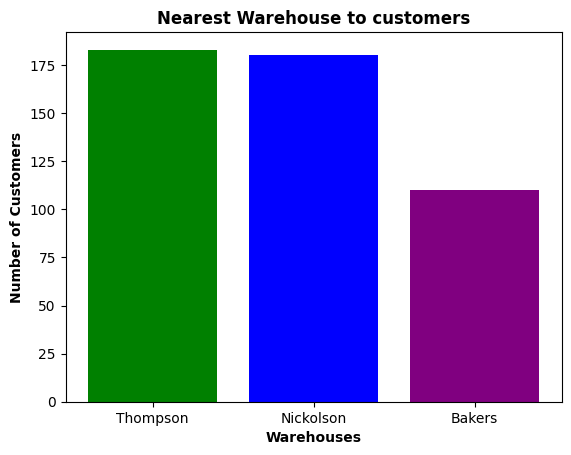

In [125]:
warehouse_counts = warehouse_filtered["nearest_warehouse"].value_counts()
y = warehouse_counts.values
x = warehouse_filtered.nearest_warehouse.unique()

colors= ["green", "blue", "purple"]

plt.bar(x, y, color=colors[:len(x)])
plt.xlabel("Warehouses", fontweight="bold")
plt.ylabel("Number of Customers", fontweight="bold")
plt.title("Nearest Warehouse to customers", fontweight="bold")
plt.show()

What percentage of customers are satisfied with their purchase? Create a visualization.

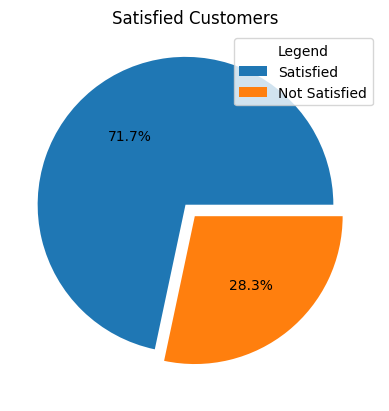

In [126]:
labels = ["Satisfied", "Not Satisfied"]
percent_true = (warehouse_filtered["is_happy_customer"] == True).sum() / len(warehouse_filtered)
percent_false = (warehouse_filtered["is_happy_customer"] == False).sum() / len(warehouse_filtered)
x = [percent_true, percent_false]
e = (0.1, 0)
plt.pie(x, explode = e, autopct="%1.1f%%")
plt.title("Satisfied Customers")
plt.legend(labels, title="Legend", loc="upper right", fontsize=10)
plt.show()
